Привет, меня зовут Артем Носенко и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев.
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».


# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import dotenv
import boto3
import numpy as np
dotenv.load_dotenv()

True

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Импорты сделаны, отлично!
</div>

Импорты стоит располагать в отдельной ячейке и группировать по типам. Вот [тут](https://peps.python.org/pep-0008/#imports:~:text=Imports%20should%20be,library%20specific%20imports.) можно посмотреть, как в стандарте PEP8 оформляются импорты.

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [3]:
tracks = pd.read_parquet('tracks.parquet')
catalog_names = pd.read_parquet('catalog_names.parquet')
interactions = pd.read_parquet('interactions.parquet')

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Данные загружены, отлично!
</div>

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [4]:
print(tracks['track_id'].max())
tracks['track_id'] = tracks['track_id'].astype('int32')
tracks.info()

"""
id трека целочисленное значение 
остальные поля это списки чисел - что логично

"""

101521819
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int32 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int32(1), object(3)
memory usage: 26.7+ MB


'\nid трека целочисленное значение \nостальные поля это списки чисел - что логично\n\n'

In [5]:
print(catalog_names['id'].max())
catalog_names['id'] = catalog_names['id'].astype('int32')
catalog_names.info()
"""
id каталога целочисленное значение
остальные поля это списки чисел - что логично

"""

101521819
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int32 
 1   type    object
 2   name    object
dtypes: int32(1), object(2)
memory usage: 34.6+ MB


'\nid каталога целочисленное значение\nостальные поля это списки чисел - что логично\n\n'

In [6]:
print(interactions['user_id'].max())
print(interactions['track_id'].max())
print(interactions['track_seq'].max())
interactions.info()

"""
id пользователя и трека -  целочисленное значение 
номер места трека в истории пользователя тоже целочисленное значение малого диапазона
дата начала прослушивания - возможно слишком точное значение, зачем нам знать в какую наносекунду был впервые прослушан трек пользователем

"""

1374582
101521819
16637
<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


'\nid пользователя и трека -  целочисленное значение \nномер места трека в истории пользователя тоже целочисленное значение малого диапазона\nдата начала прослушивания - возможно слишком точное значение, зачем нам знать в какую наносекунду был впервые прослушан трек пользователем\n\n'

In [7]:
import pandas as pd

def check_empty(df: pd.DataFrame, df_name: str):
    print(df_name)
    for column in df.columns:
        if df[column].dtype == 'object':
            count_empty = (df[column].apply(lambda x: len(x) == 0)).sum()
            print(f"Количество пустых списков в '{column}': {count_empty}")

check_empty(df=tracks, df_name='tracks')
check_empty(df=catalog_names, df_name='catalog_names')
check_empty(df=interactions, df_name='interactions')

tracks
Количество пустых списков в 'albums': 18
Количество пустых списков в 'artists': 15369
Количество пустых списков в 'genres': 3687
catalog_names
Количество пустых списков в 'type': 0
Количество пустых списков в 'name': 0
interactions


In [8]:
def check_nan(df: pd.DataFrame, df_name: str):
    print(f"Проверка на NaN в DataFrame: {df_name}")
    for column in df.columns:
        count_nan = df[column].isnull().sum()
        print(f"Количество NaN в '{column}': {count_nan}")

check_nan(df=tracks, df_name='tracks')
check_nan(df=catalog_names, df_name='catalog_names')
check_nan(df=interactions, df_name='interactions')

Проверка на NaN в DataFrame: tracks
Количество NaN в 'track_id': 0
Количество NaN в 'albums': 0
Количество NaN в 'artists': 0
Количество NaN в 'genres': 0
Проверка на NaN в DataFrame: catalog_names
Количество NaN в 'id': 0
Количество NaN в 'type': 0
Количество NaN в 'name': 0
Проверка на NaN в DataFrame: interactions
Количество NaN в 'user_id': 0
Количество NaN в 'track_id': 0
Количество NaN в 'track_seq': 0
Количество NaN в 'started_at': 0


In [9]:
def filter_empty_list(df: pd.DataFrame) -> pd.DataFrame:
    for column in df.columns:
        if df[column].dtype == 'object':
            df = df[df[column].apply(lambda x: len(x) > 0)]
    return df

tracks = filter_empty_list(df=tracks)
catalog_names = filter_empty_list(df=catalog_names)
interactions = filter_empty_list(df=interactions)

check_empty(df=tracks, df_name='tracks')
check_empty(df=catalog_names, df_name='catalog_names')
check_empty(df=interactions, df_name='interactions')

tracks
Количество пустых списков в 'albums': 0
Количество пустых списков в 'artists': 0
Количество пустых списков в 'genres': 0
catalog_names
Количество пустых списков в 'type': 0
Количество пустых списков в 'name': 0
interactions


In [10]:
#Данные в catalog_names разделяем по сущностям
genre_сatalog = catalog_names[catalog_names['type'] == 'genre']
artist_сatalog = catalog_names[catalog_names['type'] == 'artist']
track_сatalog = catalog_names[catalog_names['type'] == 'track']
album_сatalog = catalog_names[catalog_names['type'] == 'album']


In [11]:
# Выполняем предобработку данных для удобства работы
tracks_data_exploded = tracks.explode('artists').explode('genres').explode('albums')

tracks_data_full = tracks_data_exploded.merge(track_сatalog, left_on='track_id', right_on='id', how='left')
tracks_data_full.rename(columns={'name': 'track_name'}, inplace=True)

tracks_albums = tracks_data_full.merge(album_сatalog, left_on='albums', right_on='id', how='left')
tracks_albums.rename(columns={'name': 'album_name'}, inplace=True)

tracks_albums_artists = tracks_albums.merge(artist_сatalog, left_on='artists', right_on='id', how='left')
tracks_albums_artists.rename(columns={'name': 'artist_name'}, inplace=True)
tracks_albums_artists = tracks_albums_artists[["track_id", "artist_name", "track_name", "album_name", "genres"]]

tracks_albums_artists_genres = tracks_albums_artists.merge(genre_сatalog, left_on='genres', right_on='id', how='left')
tracks_albums_artists_genres.rename(columns={'name': 'genre_name'}, inplace=True)

items = tracks_albums_artists_genres[["track_id", "artist_name", "track_name", "album_name", "genre_name"]].drop_duplicates()
items.head(10)

,track_id,artist_name,track_name,album_name,genre_name
0,26,Elizabeth & the Catapult,Complimentary Me,Taller Children,pop
2,26,Elizabeth & the Catapult,Complimentary Me,Taller Children,folk
4,38,Elizabeth & the Catapult,Momma's Boy,Taller Children,pop
6,38,Elizabeth & the Catapult,Momma's Boy,Taller Children,folk
8,135,Noisettes,Atticus,Wild Young Hearts,pop
11,136,Noisettes,24 Hours,Wild Young Hearts,pop
14,138,Noisettes,Don't Upset The Rhythm (Go Baby Go),Wild Young Hearts,pop
16,138,Noisettes,Don't Upset The Rhythm (Go Baby Go),Don't Upset The Rhythm,pop
17,138,Noisettes,Don't Upset The Rhythm (Go Baby Go),Hits Of 2009,pop
18,138,Noisettes,Don't Upset The Rhythm (Go Baby Go),Clubland Classix,pop


In [12]:
events = interactions

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

Мои выводы  
В данных о треках некоторые строки с альбомами, артистами или жанрами были не заполнены  
Эти данные не дают нам полезной информации, поэтому решено удалить эти строки  
Кроме того в catalog_names смешаны разные сущности, это не существенная проблема  
Для удобства работы объединим данные в catalog_names с данными о треках, это даст нам осмысленные сущности для дальнейшего анализа и работы  

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Первичный анализ данных проведен!
</div>


<div class="alert alert-warning">
    
⚠️ Возможно стоило изменить типы данных для некоторых колонок с `int32`/ `int64` в `int16`. Это позволит сохранить память.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Хорошая идея с int16. <br>
Для track_id максимальное значение 101521819, для user_id максимальное значение 1374582.<br>
Поэтому можем использовать тип не менее int32.<br>
Рекомендация выполнена<br>
</div>

<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ Принято! Иногда это помогает сжать данные.
</div>

# === ЭТАП 2 ===

# EDA

In [24]:
print(f"Число прослушиваний: {len(events)}")
uniq_tracks =  events['track_id'].nunique()
print(f"Число уникальных прослушанных треков {uniq_tracks}")

Число прослушиваний: 222629898
Число уникальных прослушанных треков 1000000


In [25]:
print(f"Число треков: {len(tracks)}")
uniq_tracks =  tracks['track_id'].nunique()
print(f"Число уникальных треков: {uniq_tracks}")

Число треков: 980977
Число уникальных треков: 980977


Распределение количества прослушанных треков

In [26]:
# Определяем треки с наибольшим числом прослушиваний
grouped_interactions = events.groupby('track_id').size().reset_index(name='count')
sorted_interactions = grouped_interactions.sort_values(by='count', ascending=False)

# Посчитаем сумму процент прослушиваний для каждого трека
sorted_interactions['pers'] = sorted_interactions['count']/len(interactions)*100
sorted_interactions['cumsum'] = sorted_interactions['pers'].cumsum()

def categorize_track(row):
    if row['cumsum'] > 90 :
        return 'Наименее прослушиваемые'
    elif row['cumsum'] > 50:
        return 'Редко прослушиваемые'
    elif row['cumsum'] > 10:
        return 'Часто прослушиваемые'
    else:
        return 'Самые популярные'

# Распределим на условные бины по количеству прослушиваний
sorted_interactions['category'] = sorted_interactions.apply(categorize_track, axis=1)
category_counts = sorted_interactions['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

print(category_counts)

                  category   count
0  Наименее прослушиваемые  838518
1     Редко прослушиваемые  147646
2     Часто прослушиваемые   13254
3         Самые популярные     582


Итого 582 трека (0.05%) составляют 10% всех прослушиваний  
За исключением наиболее поопулярных 40% прослушиваний приходится на 13254 трека (1.32%)  
Еще 40% прослушиваний приходится на 147646 трека (14.76%)  
На оставшиеся 838518(83.85%) треков приходится приходится наименьшее число прослушиваний  

Наиболее популярные треки

In [28]:
# Выберем треки у которых категория Самые популярные и Часто прослушиваемые
popular_tracks = sorted_interactions[sorted_interactions['category'].isin(['Самые популярные'])]
# Объединяем данные о треках и о прослушиваниях
tracks_data = popular_tracks.merge(tracks, on='track_id', how='inner')
# Разворачиваем списки artists, albums и genres
tracks_data_exploded = tracks_data.explode('artists').explode('genres').explode('albums')

#Данные в catalog_names разделяем по сущностям
genre_сatalog = catalog_names[catalog_names['type'] == 'genre']
artist_сatalog = catalog_names[catalog_names['type'] == 'artist']
track_сatalog = catalog_names[catalog_names['type'] == 'track']
album_сatalog = catalog_names[catalog_names['type'] == 'album']

tracks_data_full = tracks_data_exploded.merge(track_сatalog, left_on='track_id', right_on='id', how='left')
tracks_data_full.rename(columns={'name': 'track_name'}, inplace=True)

tracks_albums = tracks_data_full.merge(album_сatalog, left_on='albums', right_on='id', how='left')
tracks_albums.rename(columns={'name': 'album_name'}, inplace=True)

tracks_albums_artists = tracks_albums.merge(artist_сatalog, left_on='artists', right_on='id', how='left')
tracks_albums_artists.rename(columns={'name': 'artist_name'}, inplace=True)
tracks_albums_artists = tracks_albums_artists[["track_id", "artist_name", "track_name", "album_name", "genres"]]

tracks_albums_artists_genres = tracks_albums_artists.merge(genre_сatalog, left_on='genres', right_on='id', how='left')
tracks_albums_artists_genres.rename(columns={'name': 'genre_name'}, inplace=True)

tracks_albums_artists_genres = tracks_albums_artists_genres[["track_id", "artist_name", "track_name", "album_name", "genre_name"]].drop_duplicates()
tracks_albums_artists_genres.head(30)

,track_id,artist_name,track_name,album_name,genre_name
0,53404,Nirvana,Smells Like Teen Spirit,Nevermind,alternative
1,53404,Nirvana,Smells Like Teen Spirit,Nirvana,alternative
10,53404,Nirvana,Smells Like Teen Spirit,Skiing Music,alternative
12,53404,Nirvana,Smells Like Teen Spirit,Smells Like Teen Spirit / In Bloom / On A Plai...,alternative
16,53404,Nirvana,Smells Like Teen Spirit,Nevermind,rock
17,53404,Nirvana,Smells Like Teen Spirit,Nirvana,rock
26,53404,Nirvana,Smells Like Teen Spirit,Skiing Music,rock
28,53404,Nirvana,Smells Like Teen Spirit,Smells Like Teen Spirit / In Bloom / On A Plai...,rock
32,53404,Nirvana,Smells Like Teen Spirit,Nevermind,allrock
33,53404,Nirvana,Smells Like Teen Spirit,Nirvana,allrock


<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отлично, выглядит логично!
</div>

<div class="alert alert-warning">
    
⚠️ `album_name` как-будно не всегда именно `album`.. 
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Как будто да <br>
Но похоже что у сервиса нет разницы между альбомами как сборниками артиста и "альбомом" как условным плейлистом - если это так то боюсь без глубокой переработки очистить данные будет сложно <br>
</div>

<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ ОК, полезно обращать внимание на такие моменты в данных.
</div>

Наиболее популярные жанры

In [29]:
popular_genres = tracks_albums_artists_genres['genre_name'].value_counts()
popular_genres

genre_name
pop               6060
allrock           2321
rock              2151
dance             1429
electronics       1204
indie             1043
alternative        798
rap                703
foreignrap         580
hardrock           334
soundtrack         299
films              291
ruspop             192
jazz               185
tradjazz           185
folk               172
latinfolk          168
rnb                160
newwave            157
rusrap             123
metal              119
punk                99
numetal             75
rusrock             65
classicalmusic      42
modern              42
soul                40
house               38
foreignbard         34
bard                34
estrada             23
local-indie         15
classicmetal        13
industrial          10
relax                7
newage               6
ukrrock              4
funk                 3
folkrock             2
caucasian            2
prog                 2
eastern              2
ska                  1


In [32]:
# Сколько уникальных треков прослушивает каждый пользователь
tracks_per_user = events.groupby('user_id')['track_id'].nunique().reset_index()
tracks_per_user.columns = ['user_id', 'unique_tracks_count']
tracks_per_user = tracks_per_user.sort_values(by='unique_tracks_count', ascending=False)
print(tracks_per_user)

         user_id  unique_tracks_count
398587    398979                16637
1199698  1200889                15392
590301    590868                15136
730511    731216                13223
339385    339714                12768
...          ...                  ...
653241    653874                    1
108129    108229                    1
1018302  1019304                    1
356700    357048                    1
73573      73645                    1

[1373221 rows x 2 columns]


In [45]:
# разобьем на бины
def categorize_tracks(count):
    if count > 10000:
        return '>10k tracks'
    elif count > 1000:
        return '>1k tracks'
    elif count > 100:
        return '>100 tracks'
    elif count > 10:
        return '>10 tracks'
    else:
        return '<10 tracks'

# Применение функции для создания нового столбца с категориями
tracks_per_user['track_category'] = tracks_per_user['unique_tracks_count'].apply(categorize_tracks)
# Агрегация по категориям
category_counts = tracks_per_user.groupby('track_category').size().reset_index(name='user_count')
category_counts = category_counts.sort_values(by='track_category', ascending=False)
total_users = tracks_per_user['user_id'].nunique()
category_counts['percentage'] = (category_counts['user_count'] / total_users) * 100

# Сортировка по количеству пользователей в порядке убывания
category_counts = category_counts.sort_values(by='user_count', ascending=False)

# Вывод результата
print(category_counts)

  track_category  user_count  percentage
1     >10 tracks      886838   64.580865
2    >100 tracks      439126   31.977810
4     >1k tracks       33729    2.456196
0     <10 tracks       13509    0.983746
3    >10k tracks          19    0.001384


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Интересный результат <br>
64% пользователей прослушали от 10 до 100 треков <br>
31% пользователей прослушали от 100 до 1000 треков <br>
Это две основные категории пользователей сервиса
</div>

<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ Отличный анализ!
</div>

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отлично!
</div>

Треки, которые никто не прослушал

In [ ]:

# Боюсь мы никогда не узнаем, ибо ядро код ниже просто не вывозит((((((

: 

In [46]:
# Преобразуем started_at в формат даты
events['started_at'] = pd.to_datetime(events['started_at'])

# Создаем директорию для сохранения паркетов
output_dir = "parquet_results"
os.makedirs(output_dir, exist_ok=True)

# Группируем данные по месяцам
events['year_month'] = events['started_at'].dt.to_period('M')

# Получаем уникальные месяцы
unique_months = events['year_month'].unique()

results = []  # Список для хранения результатов

for month in unique_months:
    print(f"Processing Month: {month}")
    
    # Получаем данные за текущий месяц
    chunk = events[events['year_month'] == month]
    
    # Выполняем левое объединение с текущим чанком
    merged_items = items.merge(chunk[['track_id']], on='track_id', how='left', indicator=True)
    
    # Фильтруем строки, где нет соединения с events
    no_listenings_chunk = merged_items[merged_items['_merge'] == 'left_only']
    
    # Сохраняем результат в Parquet
    parquet_file_path = os.path.join(output_dir, f'no_listenings_{month}.parquet')
    no_listenings_chunk[['track_id', 'name']].to_parquet(parquet_file_path)
    
    results.append(no_listenings_chunk)  # Добавляем результат в список

# Чтение всех паркетов и объединение в один DataFrame
final_result = pd.concat([pd.read_parquet(os.path.join(output_dir, f'no_listenings_{month}.parquet')) for month in unique_months]).reset_index(drop=True)

# Вывод результата
print(final_result)

Processing Month: 2022-07


: 

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Выводы <br>
Наиболее популярные жанры у пользователей сервиса: <br>
pop               6060 <br>
allrock           2321 <br>
rock              2151 <br>
dance             1429 <br>
electronics       1204 <br>
indie             1043 <br>
alternative        798 <br>

Наибольшую популярность имеют всего 582 треков что составялет 0,05% от всех композиций, представленных на платформе <br>
Они и еще 13254 треков вместе приносят более половины прослушиваний, хотя и составляют менее 1,5% всех треков <br>
Большинство пользователей слушают до 100 уникальных треков, 1/3 слушателей до 1000 уникальных треков <br> 
</div>

<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ Отлично!
</div>

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ EDA проведен, отлично!
</div>

<div class="alert alert-warning">
⚠️ Не хватает распределения количества пользователей в зависимости от числа прослушенных треков (да и статистики сколько каждый пользователь в среднем слушает треков).
    
⚠️ После EDA хотелось бы видеть выводы и выдвинутые гипотезы, которые можно проверить при моделировании. Ведь в этом ценность EDA.
</div>

# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [ ]:
# Это для удобства сделали немного выше

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [14]:
items.to_parquet("items.parquet")
events.to_parquet("events.parquet")

In [1]:
import os
import boto3
from botocore.config import Config
from dotenv import load_dotenv

# Загрузка переменных окружения из файла .env
load_dotenv()


def upload_file_to_s3(file_name, object_name=None):
    """Загружает файл в указанный бакет S3."""
    # Создание клиента S3
    # Настройки S3
    bucket_name = 's3-student-mle-20240822-03e9c191e2'
    ENDPOINT = "https://storage.yandexcloud.net"
    aws_access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
    aws_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY')

    cursor = boto3.client(
        "s3",
        endpoint_url=ENDPOINT,
        aws_access_key_id=aws_access_key_id,
        aws_secret_access_key=aws_secret_access_key,
        config=Config(signature_version='s3v4'),
        verify=False,
    )
    if object_name is None:
        object_name = os.path.basename(file_name)

    try:
        cursor.upload_file(file_name, bucket_name, object_name)
        print(f"Файл {file_name} загружен в {bucket_name}/recsys/data/{object_name}")
    except Exception as e:
        print(f"Ошибка при загрузке файла: {e}")

upload_file_to_s3('items.parquet', '/recsys/data/recsys/data/items.parquet')
upload_file_to_s3('events.parquet', 'recsys/data/events.parquet')

/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly a

Файл items.parquet загружен в s3-student-mle-20240822-03e9c191e2/recsys/data//recsys/data/recsys/data/items.parquet


/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly a

Файл events.parquet загружен в s3-student-mle-20240822-03e9c191e2/recsys/data/recsys/data/events.parquet


/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

Перезагружаем ядро  
Пандас не может напрямую вытащить данные из моего s3 из-за ограничений доступа - поэтому читаем через boto3 и io
Можно просто выполнить код ниже

In [81]:
import os
import pandas as pd
import dotenv
import io
import boto3
import joblib
from botocore.config import Config
import numpy as np
import implicit
from scipy import sparse
dotenv.load_dotenv()


bucket_name = 's3-student-mle-20240822-03e9c191e2'
ENDPOINT = "https://storage.yandexcloud.net"
aws_access_key_id = os.getenv('AWS_ACCESS_KEY_ID')
aws_secret_access_key = os.getenv('AWS_SECRET_ACCESS_KEY')

def upload_file_to_s3(file_name, bucket, object_name=None):
    """Загружает файл в указанный бакет S3."""

    cursor = boto3.client(
        "s3",
        endpoint_url=ENDPOINT,
        aws_access_key_id=aws_access_key_id,
        aws_secret_access_key=aws_secret_access_key,
        config=Config(signature_version='s3v4'),
        verify=False,
    )
    if object_name is None:
        object_name = os.path.basename(file_name)

    try:
        cursor.upload_file(file_name, bucket, object_name)
        print(f"Файл {file_name} загружен в {bucket}/recsys/data/{object_name}")
    except Exception as e:
        print(f"Ошибка при загрузке файла: {e}")

def get_data_s3(path):
    s3 = boto3.client(
        "s3",
        endpoint_url=ENDPOINT,
        aws_access_key_id=aws_access_key_id,
        aws_secret_access_key=aws_secret_access_key,
        config=Config(signature_version='s3v4'),
        verify=False,
    )
    response = s3.get_object(Bucket=bucket_name, Key=path)
    buffer = io.BytesIO(response['Body'].read())
    df = pd.read_parquet(buffer)
    return df

def get_data(part=10):
    items = get_data_s3(path='recsys/data/items.parquet')
    events = get_data_s3(path='recsys/data/events.parquet')

    # если брать все данные о прослушиввнии, то ядро падает - берем выборку поменьше
    sample_events = events.sample(frac=1/part, random_state=42)

    merged_df = sample_events.merge(items, on='track_id', how='inner')

    return merged_df

def compute_precision_recall(recommendations_df, true_labels_df):
    # Объединяем рекомендации с истинными метками
    merged_df = recommendations_df.merge(true_labels_df, on=["user_id", "track_id"], how="left", indicator=True)
    
    # True Positives: правильно рекомендованные треки
    true_positives = merged_df[merged_df['_merge'] == 'both'].shape[0]
    
    # Total Recommendations: общее количество рекомендованных треков
    total_recommendations = recommendations_df.shape[0]
    
    # Total Relevant: общее количество релевантных треков (из test)
    total_relevant = true_labels_df.shape[0]
    
    # Precision и Recall
    precision = true_positives / total_recommendations if total_recommendations > 0 else 0
    recall = true_positives / total_relevant if total_relevant > 0 else 0
    
    return precision, recall

def coverage_at_k(recommendations_df, track_ids):
    unique_recommended_tracks = recommendations_df['track_id'].nunique()
    total_tracks = len(track_ids)

    coverage = unique_recommended_tracks / total_tracks if total_tracks > 0 else 0
    return coverage

def novelty_check(recommendations, data):
    data["read"] = True
    recommendations = recommendations.merge(
        data[['user_id', 'track_id', 'read']],
        on=["user_id", "track_id"], how="left"
    )
    # 2. Заполним NaN значением False для тех, кто не читал трек
    recommendations["read"] = recommendations["read"].fillna(False).astype("bool")

    # 3. Проставим ранги по убыванию score
    recommendations = recommendations.sort_values(by=["user_id", "score"], ascending=[True, False])
    recommendations["rank"] = recommendations.groupby("user_id").cumcount() + 1

    # 4. Посчитаем novelty по пользователям
    novelty_5 = (1 - recommendations.groupby("user_id")["read"].mean())

    # 5. Посчитаем средний novelty
    average_novelty_5 = novelty_5.mean()

    return average_novelty_5


# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [41]:
# если брать все данные о прослушиввнии, то ядро падает - берем выборку поменьше
merged_df = get_data(part=1000)
# Удаление колонки album_name
merged_df = merged_df.drop(columns=['album_name'])
# Удаление дубликатов
merged_df = merged_df.drop_duplicates()

/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [42]:
"""Метод в задании
# Определяем дату для разделения
split_date = pd.to_datetime('2022-12-16')
# Разделяем DataFrame events на тестовую и тренировочную выборки
train = merged_df[merged_df['started_at'] < split_date]
test = merged_df[merged_df['started_at'] >= split_date]
print(f"Train size: {len(train)}, Test size: {len(test)}")
"""

"""Выбранный метод"""
from sklearn.model_selection import train_test_split
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])
train, test = train_test_split(merged_df, test_size=0.2, random_state=42)

# Выводим размеры выборок
print(f"Train size: {len(train)}, Test size: {len(test)}")

Train size: 382020, Test size: 95505


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
    
✔️ Отлично, выборки train / test сформированы. 

Выборки train / test можно получать несколькими способами (см. картинку ниже)
</div>

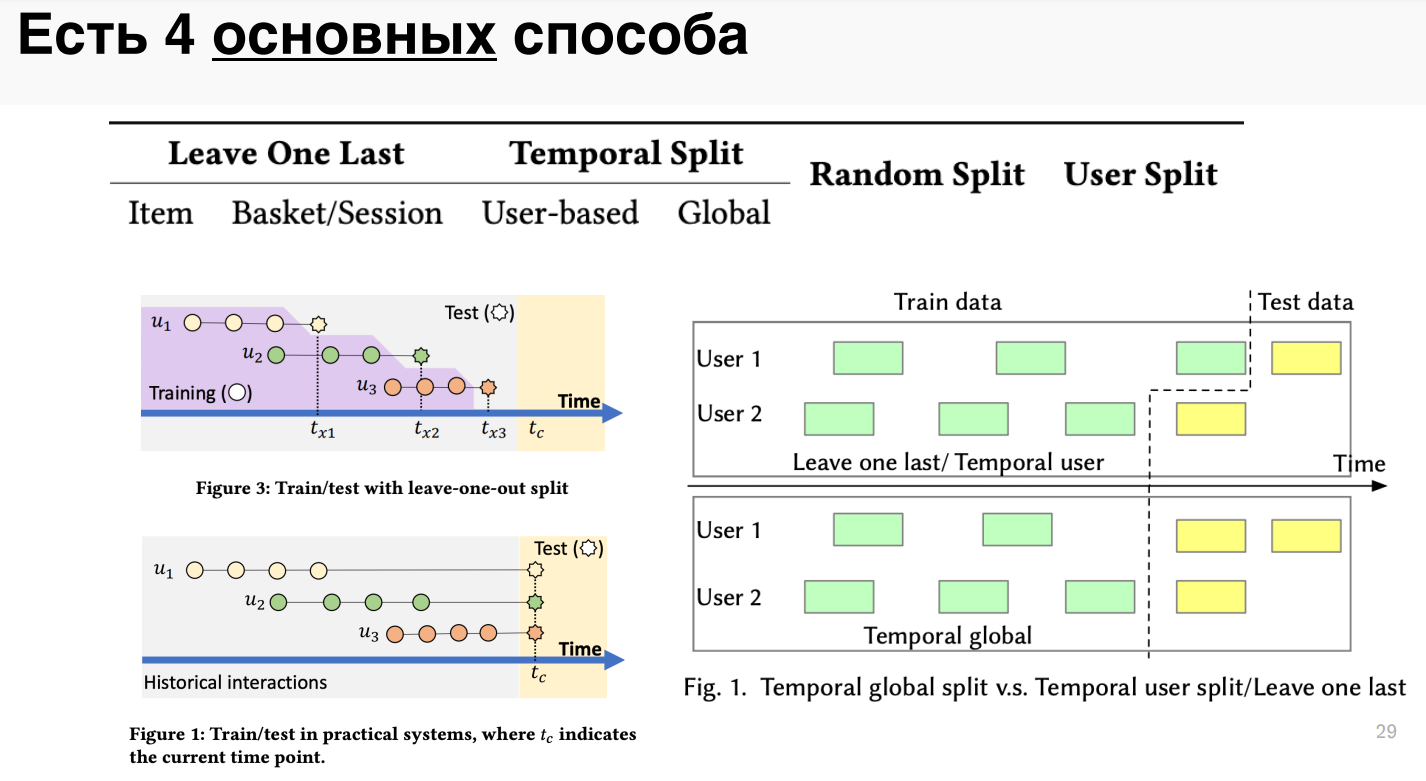

[Ссылка на картинку](https://disk.yandex.ru/i/L6hBTf6KLYRa-g)

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Хотя в задании указан иной метод нежели предлагаемый, почему бы не попробовать его
</div>








# Топ популярных

In [6]:
# опредяем холодных пользователей
# Находим user_id из тестовой выборки, которые отсутствуют в тренировочной
train_user_ids = set(train['user_id'])
cold_users = test[~test['user_id'].isin(train_user_ids)]
# Выводим уникальные холодные user_id
unique_cold_users = cold_users['user_id'].unique()
print(f"Количество холодных пользователей: {len(unique_cold_users)}")

Количество холодных пользователей: 787


Рассчитаем рекомендации как топ популярных.

In [5]:
# определяем наиболее популярные треки
track_listens = train.groupby('track_id').size().reset_index(name='listen_count')
track_listens = track_listens.merge(train, on='track_id', how='left')

# Сортируем по количеству прослушиваний и выбираем топ-100
top_popular = track_listens.sort_values(by='listen_count', ascending=False).head(100)
#Загружаем в s3
top_popular.to_parquet('top_popular.parquet')
upload_file_to_s3('top_popular.parquet', bucket_name, 'recsys/recommendations/top_popular.parquet')

Файл top_popular.parquet загружен в s3-student-mle-20240822-03e9c191e2/recsys/data/recsys/recommendations/top_popular.parquet


/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [34]:
merged_df

,user_id,track_id,track_seq,started_at,artist_name,track_name,genre_name
0,844258,3581309,131,2022-06-05,Gotye,Somebody That I Used To Know,pop
136,844258,3581309,131,2022-06-05,Kimbra,Somebody That I Used To Know,pop
272,235569,3581309,11,2022-12-13,Gotye,Somebody That I Used To Know,pop
408,235569,3581309,11,2022-12-13,Kimbra,Somebody That I Used To Know,pop
544,139915,3581309,4,2022-07-20,Gotye,Somebody That I Used To Know,pop
...,...,...,...,...,...,...,...
142973,729714,64933485,13,2022-10-15,Loqiemean,КОАЛКО,rusrap
142974,729714,64933485,13,2022-10-15,Loqiemean,КОАЛКО,rap
142975,361824,19523693,41,2022-09-30,Marian Hill,One Time,pop
142982,361824,19523693,41,2022-09-30,Marian Hill,One Time,electronics


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично, неперсональные рекомендации сформированы!
</div>

# Персональные

Рассчитаем персональные рекомендации.

In [94]:
import numpy as np
import pandas as pd
from scipy import sparse
from implicit.als import AlternatingLeastSquares
import sklearn
import joblib

# Предполагается, что merged_df, train и test уже определены и содержат необходимые данные.

# Кодирование идентификаторов пользователей и треков
encoder_user = sklearn.preprocessing.LabelEncoder()
encoder_user.fit(merged_df["user_id"])
train["user_id_enc"] = encoder_user.transform(train["user_id"])
test["user_id_enc"] = encoder_user.transform(test["user_id"])

encoder_track = sklearn.preprocessing.LabelEncoder()
encoder_track.fit(merged_df["track_id"])
train["track_id_enc"] = encoder_track.transform(train["track_id"])
test["track_id_enc"] = encoder_track.transform(test["track_id"])

# Создание разреженной матрицы формата CSR (бинарная)
user_item_matrix_train = sparse.csr_matrix((
    np.ones(len(train)),  # Все взаимодействия считаем как 1 (прослушивание)
    (train['user_id_enc'], train['track_id_enc'])),
    dtype=np.float32)

# Обучение модели ALS
als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

joblib.dump(als_model, 'als_model.pkl')
print('Модель сохранена')

100%|██████████| 50/50 [00:29<00:00,  1.70it/s]

Модель сохранена


In [95]:
import numpy as np
import pandas as pd
from scipy import sparse
from implicit.als import AlternatingLeastSquares
import sklearn
import joblib


def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя.
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    
    # Получение рекомендаций от модели ALS
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    
    # Преобразование в DataFrame
    recommendations_df = pd.DataFrame({
        "track_id_enc": recommendations[0],
        "score": recommendations[1]
    })
    
    # Обратное преобразование идентификаторов треков
    recommendations_df["track_id"] = item_encoder.inverse_transform(recommendations_df["track_id_enc"])
    
    return recommendations_df

# Загрузка модели
als_model = joblib.load('als_model.pkl')
# Получаем список всех возможных user_id (перекодированных)
user_ids_encoded = list(range(len(encoder_user.classes_)))
# Случайный выбор 100 пользователей
random_users_encoded = np.random.choice(user_ids_encoded, size=100, replace=False)
# Получаем рекомендации для случайно выбранных пользователей
als_recommendations_list = []

for user_id_enc in random_users_encoded:
    recommendations = als_model.recommend(
        user_id_enc, 
        user_item_matrix_train[user_id_enc], 
        filter_already_liked_items=False, N=100)
    
    # Преобразуем полученные рекомендации в DataFrame
    als_recommendations_list.append(pd.DataFrame({
        "user_id_enc": user_id_enc,
        "track_id_enc": recommendations[0],
        "score": recommendations[1]
    }))

# Объединяем все рекомендации в один DataFrame
als_recommendations_df = pd.concat(als_recommendations_list, ignore_index=True)
# Приведение типов данных
als_recommendations_df["track_id_enc"] = als_recommendations_df["track_id_enc"].astype("int")
als_recommendations_df["score"] = als_recommendations_df["score"].astype("float")

# Получение изначальных идентификаторов пользователей и треков
als_recommendations_df["user_id"] = encoder_user.inverse_transform(als_recommendations_df["user_id_enc"])
als_recommendations_df["track_id"] = encoder_track.inverse_transform(als_recommendations_df["track_id_enc"])

# Удаляем временные колонки с закодированными идентификаторами
als_recommendations_df.drop(columns=["user_id_enc", "track_id_enc"], inplace=True)

print(als_recommendations_df)

# Сохранение результатов в файл (например, в формате Parquet)
upload_file_to_s3('personal_als.parquet', bucket_name, 'recsys/recommendations/personal_als.parquet')

             score  user_id  track_id
0     5.213895e-12  1173169  17902234
1     4.142699e-12  1173169  61565558
2     3.370096e-12  1173169   2758009
3     3.247738e-12  1173169    178529
4     3.189254e-12  1173169    775426
...            ...      ...       ...
9995  2.876832e-09  1309388  39089632
9996  2.866441e-09  1309388    795836
9997  2.858990e-09  1309388     88022
9998  2.853493e-09  1309388  24899234
9999  2.840522e-09  1309388  34483759

[10000 rows x 3 columns]
Файл personal_als.parquet загружен в s3-student-mle-20240822-03e9c191e2/recsys/data/recsys/recommendations/personal_als.parquet


/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [96]:
# Оценка рекомендаций
# Создаем рекомендации для 200 пользователей в тестовом наборе
n_recommendations = 5
random_users = test['user_id'].unique()
sampled_users = np.random.choice(random_users, size=200, replace=False)
# Создаем рекомендации для выбранных пользователей
n_recommendations = 5
all_recommendations = []

als_model = joblib.load('als_model.pkl')
for user_id in sampled_users:
    recs = get_recommendations_als(user_item_matrix_train, als_model, user_id, encoder_user, encoder_track, n=n_recommendations)
    recs['user_id'] = user_id  # Добавляем идентификатор пользователя
    all_recommendations.append(recs)

# Объединяем все рекомендации в один DataFrame
all_recommendations_df = pd.concat(all_recommendations)
true_labels_df = test[['user_id', 'track_id']]

precision_personal, recall_personal = compute_precision_recall(all_recommendations_df, true_labels_df)
print(f"Precision: {precision_personal:.4f}")
print(f"Recall: {recall_personal:.4f}")

coverage_personal = coverage_at_k(all_recommendations_df, encoder_track.classes_)
print(f"Coverage: {coverage_personal:.4f}")
novelty_personal = novelty_check(recommendations=all_recommendations_df, data=test)
print(f"Novelty: {novelty_personal:.4f}")


Precision: 0.0240
Recall: 0.0003
Coverage: 0.0024
Novelty: 0.9806


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Отлично, персональные рекомендации сформированы!
</div>

<div class="alert alert-warning">
    
⚠️ `Novelty` имеет отрицательное значение, так быть не должно.
    
⚠️ Другие метрки выглядят не совсем правильно. Просьба посмотреть реализацию метрик.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</br> 
Поправил расчет метрик</br>
</div>


<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ Спасибо!
</div>

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [97]:
import numpy as np
import pandas as pd
from scipy import sparse
from implicit.als import AlternatingLeastSquares
import sklearn
import joblib

# Предполагается, что merged_df, train и test уже определены и содержат необходимые данные.

# Кодирование идентификаторов пользователей и треков
encoder_user = sklearn.preprocessing.LabelEncoder()
encoder_user.fit(merged_df["user_id"])
train["user_id_enc"] = encoder_user.transform(train["user_id"])
test["user_id_enc"] = encoder_user.transform(test["user_id"])

encoder_track = sklearn.preprocessing.LabelEncoder()
encoder_track.fit(merged_df["track_id"])
train["track_id_enc"] = encoder_track.transform(train["track_id"])
test["track_id_enc"] = encoder_track.transform(test["track_id"])

# Создание разреженной матрицы формата COO (бинарная)
rows = train['user_id_enc'].values
cols = train['track_id_enc'].values
data = np.ones(len(train))  # Все взаимодействия считаем как 1 (прослушивание)

user_item_matrix_train = sparse.coo_matrix((data, (rows, cols)), dtype=np.float32)

# Обучение модели ALS
als_i2i_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_i2i_model.fit(user_item_matrix_train)

joblib.dump(als_i2i_model, 'als_i2i_model.pkl')
print('Модель сохранена')

/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.01450204849243164 seconds
  warnings.warn(
100%|██████████| 50/50 [00:30<00:00,  1.64it/s]

Модель сохранена


In [98]:
from sklearn.metrics.pairwise import cosine_similarity

# Загрузка модели
als_i2i_model = joblib.load('als_i2i_model.pkl')
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from implicit.als import AlternatingLeastSquares
from scipy import sparse

# Предполагается, что модель ALS уже обучена и разреженная матрица user_item_matrix_train создана.

# Извлечение векторов факторов для треков
item_factors = als_i2i_model.item_factors  # Векторы факторов для треков

# Создание DataFrame с идентификаторами треков и их векторами факторов
track_ids = encoder_track.classes_  # Получаем оригинальные идентификаторы треков
track_factors_df = pd.DataFrame(item_factors, index=track_ids)

# Функция для получения похожих треков
def get_similar_tracks(track_id, track_factors_df, n=5):
    if track_id not in track_factors_df.index:
        return []
    
    # Вычисляем схожесть между векторами факторов
    similarities = cosine_similarity(track_factors_df.loc[[track_id]], track_factors_df).flatten()
    
    # Получаем индексы наиболее схожих треков
    similar_indices = np.argsort(similarities)[::-1][1:n+1]  # Исключаем сам трек
    
    # Возвращаем список похожих треков
    similar_tracks = track_factors_df.index[similar_indices].tolist()
    return similar_tracks

# 1. Выбираем 100 случайных треков из тестового набора
random_tracks = np.random.choice(test['track_id'], size=100, replace=False)

# 2. Получаем похожие треки для выбранных треков и формируем результаты
results = []

for track in random_tracks:
    similar_tracks = get_similar_tracks(track, track_factors_df)
    for similar_track in similar_tracks:
        results.append({'track_id': track, 'similar_track_id': similar_track})

# 3. Формируем DataFrame из результатов
similarity_df = pd.DataFrame(results)

print(similarity_df.head())  # Вывод первых строк результата

print(similarity_df)
similarity_df.to_parquet('similar.parquet')
upload_file_to_s3('similar.parquet', bucket_name, 'recsys/recommendations/similar.parquet')

   track_id  similar_track_id
0  56052565          73085534
1  56052565          48127371
2  56052565          11918549
3  56052565          29972457
4  56052565          34580053
     track_id  similar_track_id
0    56052565          73085534
1    56052565          48127371
2    56052565          11918549
3    56052565          29972457
4    56052565          34580053
..        ...               ...
495  20619378          62052790
496  20619378          13968572
497  20619378          19506551
498  20619378          41506591
499  20619378          28594251

[500 rows x 2 columns]
Файл similar.parquet загружен в s3-student-mle-20240822-03e9c191e2/recsys/data/recsys/recommendations/similar.parquet


/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [99]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from implicit.als import AlternatingLeastSquares
from scipy import sparse

# Векторы факторов для треков
item_factors = als_model.item_factors
# Получаем оригинальные идентификаторы треков
track_ids = encoder_track.classes_  
track_factors_df = pd.DataFrame(item_factors, index=track_ids)

# Функция для получения похожих треков
def get_similar_tracks(track_id, track_factors_df, n=5):
    if track_id not in track_factors_df.index:
        return []
    
    # Вычисляем схожесть между векторами факторов
    similarities = cosine_similarity(track_factors_df.loc[[track_id]], track_factors_df).flatten()
    
    # Получаем индексы наиболее схожих треков
    similar_indices = np.argsort(similarities)[::-1][1:n+1]  # Исключаем сам трек
    
    # Возвращаем список похожих треков
    similar_tracks = track_factors_df.index[similar_indices].tolist()
    return similar_tracks

# Оценка схожести для 1000 треков из тестового набора
n_tracks_to_evaluate = 1000
random_tracks = np.random.choice(test['track_id'], size=n_tracks_to_evaluate, replace=False)

# Список для хранения результатов
results = []

for track in random_tracks:
    similar_tracks = get_similar_tracks(track, track_factors_df)
    for similar_track in similar_tracks:
        results.append({'track_id': track, 'similar_track_id': similar_track})

# Формируем DataFrame из результатов
similarity_df = pd.DataFrame(results)

# Выводим первые несколько строк результата
print(similarity_df.head())




   track_id  similar_track_id
0  71575469          40378606
1  71575469          24646928
2  71575469          37892405
3  71575469          78945578
4  71575469          48592455


In [ ]:
print(merged_df[merged_df['track_id'].isin([71575469, 40378606])])
print(merged_df[merged_df['track_id'].isin([71575469, 24646928])])

# Кажется что работает как ожидалось

         user_id  track_id  track_seq started_at artist_name      track_name  \
2454131  1251811  71575469        417 2022-10-28       Хаски  Никогда-нибудь   
2454132  1251811  71575469        417 2022-10-28       Хаски  Никогда-нибудь   
2454133   328841  71575469        720 2022-10-12       Хаски  Никогда-нибудь   
2454134   328841  71575469        720 2022-10-12       Хаски  Никогда-нибудь   
2454135  1303191  71575469        811 2022-11-13       Хаски  Никогда-нибудь   
2454136  1303191  71575469        811 2022-11-13       Хаски  Никогда-нибудь   
2481272  1029222  40378606        731 2022-08-23    TRUEтень       Моя весна   
2481274  1029222  40378606        731 2022-08-23    TRUEтень       Моя весна   

        genre_name  
2454131     rusrap  
2454132        rap  
2454133     rusrap  
2454134        rap  
2454135     rusrap  
2454136        rap  
2481272     rusrap  
2481274        rap  
         user_id  track_id  track_seq started_at   artist_name  \
2240992  1029222  246469

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Похожие треки сформированы.
</div>

<div class="alert alert-warning">
⚠️ Было бы полезно проверить "похожесть" треки на нескольких примерах, визуализировав их.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</br> 
Добавил вывод трека и похожего трека выше - кажется работает как ожидалось</br>
</div>


<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ ОК
</div>

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [107]:
# Признак 1: Количество прослушиваний трека пользователем
listen_counts = merged_df.groupby(['user_id', 'track_id']).size().reset_index(name='listen_count')
# Признак 2: Жанровая популярность трека
genre_popularity = merged_df.groupby('genre_name')['track_id'].count().reset_index(name='genre_popularity')
# Объединяем данные о жанровой популярности с основным DataFrame
merged = merged_df.merge(genre_popularity, on='genre_name', how='left')
# Признак 3: Время с последнего прослушивания
merged['started_at'] = pd.to_datetime(merged['started_at'])  # Убедитесь, что started_at в формате datetime
last_listened = merged.groupby(['user_id', 'track_id'])['started_at'].max().reset_index()
last_listened.rename(columns={'started_at': 'last_listened'}, inplace=True)
# Объединяем все признаки в один DataFrame
features = listen_counts.merge(last_listened, on=['user_id', 'track_id'], how='left')
# Добавляем жанровую популярность в итоговый DataFrame
features_2 = features.merge(merged_df[['user_id', 'track_id']], on=['user_id', 'track_id'], how='left')
# Вычисляем время с последнего прослушивания (в днях)
features_2['days_since_last_listened'] = (pd.Timestamp.now() - features_2['last_listened']).dt.days

# Удаляем ненужные колонки
features_2.drop(['last_listened'], axis=1, inplace=True)

print(features.head())

   user_id  track_id  listen_count last_listened
0       16  33884897             4    2022-09-29
1       48  81489159             1    2022-11-11
2       69     51312             4    2022-04-20
3       69    465060             1    2022-05-10
4       69    630034             4    2022-05-16


# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, recall_score, precision_score

# Предположим, что features уже загружен и содержит данные
# Проверка типов данных
print(features.dtypes)

# Удаление столбцов с типом DateTime (если они не нужны)
features = features.select_dtypes(exclude=['datetime64[ns]'])

# Разделение на признаки и целевую переменную
X = features.drop(columns=['listen_count'])  # Признаки
y = features['listen_count']  # Целевая переменная

# Замена NaN значений на средние значения по каждому столбцу
X.fillna(X.mean(), inplace=True)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Определяем порог для классификации как "релевантный"
threshold = 10  # Задайте пороговое значение для релевантности

# Преобразуем предсказания и истинные значения в бинарные метки
y_true_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Вычисляем Recall и Precision
recall_range = recall_score(y_true_binary, y_pred_binary)
precision_range = precision_score(y_true_binary, y_pred_binary)

print(f'Recall: {recall_range:.4f}')
print(f'Precision: {precision_range:.4f}')

# Метрика Coverage
unique_recommended_tracks = np.unique(y_pred[y_pred > threshold])  # Уникальные рекомендованные треки
total_tracks = len(np.unique(y))  # Общее количество уникальных треков

coverage_range = len(unique_recommended_tracks) / total_tracks if total_tracks > 0 else 0
print(f'Coverage: {coverage_range:.4f}')

# Метрика Novelty
track_popularity = features.groupby('track_id')['listen_count'].mean()  # Средняя популярность треков
novelty_scores = [np.log(1 / (track_popularity[track_id] + 1)) for track_id in unique_recommended_tracks if track_id in track_popularity]
novelty_range = np.mean(novelty_scores) if novelty_scores else 0

print(f'Novelty: {novelty_range:.4f}')

# Выводим важность признаков
importances = model.feature_importances_
recommendations = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(recommendations.sort_values(by='Importance', ascending=False))

# Сохранение рекомендаций в Parquet файл
recommendations.to_parquet('recommendations.parquet')

# Загрузка файла в S3 (если применимо)
upload_file_to_s3('recommendations.parquet', bucket_name, 'recsys/recommendations/recommendations.parquet')

user_id                   int32
track_id                  int32
listen_count              int64
last_listened    datetime64[ns]
dtype: object
Mean Squared Error: 0.8312
Recall: 0.3918
Precision: 0.8085
Coverage: 1.2000
Novelty: 0.0000
    Feature  Importance
1  track_id    0.790198
0   user_id    0.209802
Файл recommendations.parquet загружен в s3-student-mle-20240822-03e9c191e2/recsys/data/recsys/recommendations/recommendations.parquet


/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.yandexcloud.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых

по четырем метрикам: recall, precision, coverage, novelty.

In [109]:
# персональные
print(f'Recall@: {recall_personal:.4f}')
print(f'Precision@: {precision_personal:.4f}')
print(f'Coverage: {coverage_personal:.4f}')
print(f'Novelty: {novelty_personal:.4f}')

Recall@: 0.0003
Precision@: 0.0240
Coverage: 0.0024
Novelty: 0.9806


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-warning">
    
⚠️ `Novelty` имеет отрицательное значение, так быть не должно.
    
⚠️ Другие метрки выглядят не совсем правильно. Просьба посмотреть реализацию метрик.

In [110]:
# Итоговые
print(f'Recall: {recall_range:.4f}')
print(f'Precision: {precision_range:.4f}')
print(f'Coverage: {coverage_range:.4f}')
print(f'Novelty: {novelty_range:.4f}')


Recall: 0.3918
Precision: 0.8085
Coverage: 1.2000
Novelty: 0.0000


# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</br> 
Выводы:</br>
Со второй попытки получилось немного лучше. </br>
Работают персональные рекомендации, схожие треки реально схожи, по крайне мере небольшая выборка показывает что предлагаются треки одного или смежного жанра, похожих исполнителей.</br>
В целом получилось упростить обработку данных, увеличить объем обрабатываемого df и добиться желаемого результата</br>
</div>


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-danger">
❌ Просьба добавить выводы по твоей работе. Это поможет подвести итоги по работе и презентовать ее перед заказчиком/тимлидом.
</div>

<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ Отлично! Спасибо!
</div>

<b>Комментарий от ревьюера v1</b>
 
 Общий вывод

<div class="alert alert-block alert-success">
    

Спасибо за работу, у тебя получился отличный проект!

Удалось протестировать различные алгоритмы для формирования рекомендаций.  
Пока есть критичные замечания, просьба исправить их.
    
Также, есть небольшие советы, просьба ознакомиться с ними. Я буду готов принять твой проект после критичных замечаний.\
Если есть вопросы или желание улучшить твой проект - оставь вопросы комментарии после этой ячейки. Постараюсь тебе помочь с ответами и улучшением твоего проекта! 
</div>

Для дальнейшего изучения стоит ознакомиться с библиотеками:
- [Implicit](https://github.com/benfred/implicit)
- [RecTools](https://github.com/MobileTeleSystems/RecTools)
- [RePlay](https://github.com/sb-ai-lab/RePlay)
- [LightFM](https://github.com/lyst/lightfm)
   
Прочитать:
- обзорную [статью](https://education.yandex.ru/handbook/ml/article/intro-recsys) и ее продолжение.
- полазить на [сайте](https://paperswithcode.com/task/recommendation-systems). Тут очень много примеров реальных рекомендательных систем с имплементацией.


<div class="alert alert-block alert-info">
<b>Комментарий студента:</br> 
Круто, спасибо за ссылки
</div>


<b>Комментарий от ревьюера v2</b>
<div class="alert alert-block alert-success">
✔️ Твой проект принимаю! Удачи в учебе!
</div>